In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

import nucleus, utils, data_gen, RetinaNet

### Dataset

In [2]:
# subclass of utils.Dataset()
train_ds = nucleus.NucleusDataset()
train_ds.load_nucleus(
    dataset_dir='path/to/dataset',
    subset='train'
)
train_ds.prepare()
train_ds.get_info()

There are 645 images and 2 classes.


(array([0, 1]), ['background', 'nucleus'])

In [3]:
# subclass of utils.Dataset()
val_ds = nucleus.NucleusDataset()
val_ds.load_nucleus(
    dataset_dir='path/to/dataset',
    subset='val'
)
val_ds.prepare()
val_ds.get_info()

There are 25 images and 2 classes.


(array([0, 1]), ['background', 'nucleus'])

### Config

In [4]:
# subclass of config.Config()
config = nucleus.NucleusConfig()
config.display()

----------Configurations----------

alpha                          0.25
architecture                   resnet50
augmenters                     [<utils.Rotate object at 0x000001783B58C788>, <utils.FlipLR object at 0x000001782F11AA88>, <utils.FlipUD object at 0x000001782F0C7E08>, <utils.Contrast object at 0x0000017832953088>, <utils.Rotate1 object at 0x000001783B978F88>]
batch_size_global              12
batch_size_per_gpu             12
beta_2                         0.999
channels_fmap                  256
channels_mean                  None
channels_std                   None
checkpoint_path                None
confidence_threshold           0.05
denser                         True
early_stopping                 False
epochs                         2
fmap_sizes                     [(64, 64), (32, 32), (16, 16), (7, 7), (3, 3)]
fmap_strides                   [8, 16, 32, 64, 128]
gamma                          2.0
image_shape                    (512, 512, 3)
iou_threshold               

### Meta & Stats

In [5]:
train_meta, train_stats = data_gen.get_ds_info(train_ds, config)

image_sizes, rgb_images, box_sizes, num_objects, \
num_pos_anchors, num_nu_anchors, num_neg_anchors, offsets = train_stats


Error in processing image 20b20ab049372d184c705acebe7af026d3580f5fd5a72ed796e3622e1685af2f

Error in processing image 220b37f4ca7cab486d2b71cd87a46ee7411a5aa142799d96ed98015ab5ba538a
time: 167.331940s



In [6]:
h, w = np.split(np.stack(image_sizes, axis=0), 2, axis=1)
s = np.minimum(h, w)
res = np.unique(s, return_counts=True)
print('shortest sides', res[0])
print('counts', res[1])

shortest sides [ 256  260  360  512  520  603 1024]
counts [428   5  90  13  90   4  15]


offsets
 (169333, 4) 
 [0.00039761 0.0005811  0.01490408 0.01419392] 
 [0.13985884 0.13968822 0.28523967 0.29133585] 
 [-2.2097063 -2.3386106 -3.1191635 -3.1191635] 
 [1.1875    1.7235732 1.5841202 1.6968548]


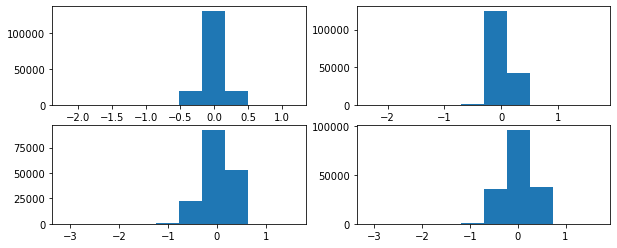

In [7]:
offsets1 = np.concatenate(offsets, axis=0)
print(
    'offsets\n', 
    offsets1.shape, '\n',
    np.mean(offsets1, axis=0), '\n',
    np.std(offsets1, axis=0), '\n',
    np.min(offsets1, axis=0), '\n', 
    np.max(offsets1, axis=0))

plt.figure(figsize=(10,4))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.hist(offsets1[:,i])
plt.show()

### Generator

C:\Users\mingm\miniconda3\envs\tf-gpu\lib\site-packages\tensorflow_addons\image\transform_ops.py:143: UserWarning: fill_value is not supported and is always 0 for TensorFlow < 2.4.0.
  "fill_value is not supported and is always 0 for TensorFlow < 2.4.0."


time: 3.943534s

images (12, 512, 512, 3) float32
[0.09834906 0.09000345 0.11188958]
gt_anchor_indicators (12, 48906) int32
gt_anchor_class_ids (12, 48906, 1) int32
gt_anchor_offsets (12, 48906, 4) float32
[-0.00298825 -0.0046776  -0.04865104 -0.04613904]


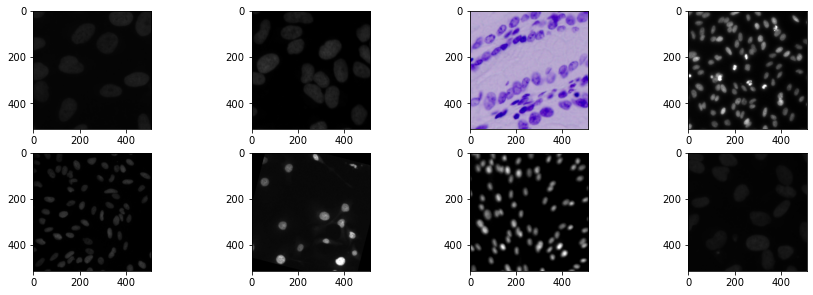

In [5]:
train_gen = data_gen.data_generator(
    train_ds, 
    config, 
    shuffle=True, 
    subset='train')

t1 = time.time()
data = next(train_gen)
t2 = time.time()
print('time: %fs\n' %(t2-t1))

for k, v in data.items():
    print(k, v.shape, v.dtype)
    if k == 'images':
        print(np.mean(v, axis=(0,1,2)))
    elif k == 'gt_anchor_offsets':
        print(np.mean(v, axis=(0,1)))
    
plt.figure(figsize=(15,10))
for i in range(8):
    plt.subplot(4, 4, i+1)
    tmp = data['images'][i]
    plt.imshow(tmp)

time: 4.762297s

images (12, 512, 512, 3) float32
[0.34243217 0.32274348 0.3712733 ]
gt_anchor_indicators (12, 48906) int32
gt_anchor_class_ids (12, 48906, 1) int32
gt_anchor_offsets (12, 48906, 4) float32
[-0.00310103 -0.00474947 -0.04904644 -0.04676852]


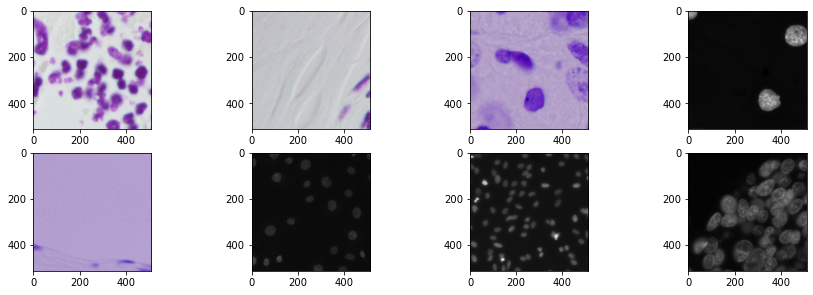

In [6]:
val_gen = data_gen.data_generator(val_ds, config, subset='val')

t1 = time.time()
data = next(val_gen)
t2 = time.time()
print('time: %fs\n' %(t2-t1))

for k, v in data.items():
    print(k, v.shape, v.dtype)
    if k == 'images':
        print(np.mean(v, axis=(0,1,2)))
    elif k == 'gt_anchor_offsets':
        print(np.mean(v, axis=(0,1)))
    
plt.figure(figsize=(15,10))
for i in range(8):
    plt.subplot(4, 4, i+1)
    tmp = data['images'][i]
    plt.imshow(tmp)

### Training

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on

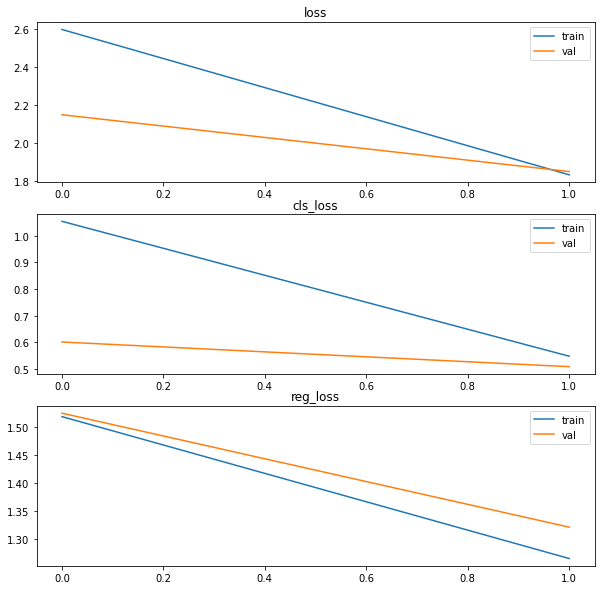

In [7]:
retinanet = RetinaNet.RetinaNet('training', config)
retinanet.train(train_gen, val_gen)

### Detection

In [4]:
# subclass of config.Config()
config = nucleus.NucleusInferenceConfig()

In [5]:
retinanet = RetinaNet.RetinaNet('inference', config)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on

In [6]:
mAP, val_res = retinanet.evaluate(val_ds, verbose=False)
times = val_res[:,2].astype(np.float)
print('median detection time:', np.median(times))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on

loading image: 0.004000s
loading masks: 0.021515s
resize mode: pad_fpn
resizing image: 0.053001s
resizing masks: 0.115000s
time: 0.231516s

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert

detection time: 0.076999s

# predictions 42


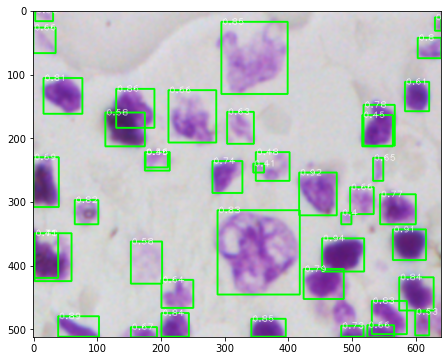

In [8]:
idx = np.random.randint(val_ds.num_images)

t1 = time.time()
image, boxes, class_ids, cache = val_ds.load_data(
    idx,
    shortest_side=config.shortest_side,
    mode=config.resize_mode,
    verbose=1
)
t2 = time.time()
print('time: %fs\n' %(t2-t1))

image1 = image[np.newaxis,...]
boxes_batch, class_ids_batch, scores_batch, t = retinanet.detect(
    image1, verbose=True)

i = 0
pred_boxes = boxes_batch[i].numpy()
# since detected classes are 0-base and objects only (not background 0), 
# increase 1
pred_class_ids = class_ids_batch[i].numpy() + 1
pred_scores = np.round(scores_batch[i].numpy(), 2)
vis_scores = pred_scores.astype(np.str).tolist()
print('# predictions', len(pred_scores))

tmp = utils.draw_boxes(
    image, pred_boxes, color=(0,255,0), thickness=2, captions=vis_scores)
plt.figure(figsize=(10,6))
plt.imshow(tmp)